# Evaluating images (fitness) with AI-image detection
The lower the AI-score the better the image should be (in theory).
Using https://huggingface.co/umm-maybe/AI-image-detector (https://medium.com/@matthewmaybe/can-an-ai-learn-to-identify-ai-art-545d9d6af226)

Uses the "./testimages" folder

In [1]:
!pip install transformers matplotlib --quiet

In [6]:
from transformers import pipeline
import evolutionary_model_helpers.auto_device as ad

device = ad.auto_device()
pipeline = pipeline("image-classification", model="umm-maybe/AI-image-detector", device=device)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


# Simple inference

[{'score': 0.8564771413803101, 'label': 'artificial'}, {'score': 0.14352279901504517, 'label': 'human'}]


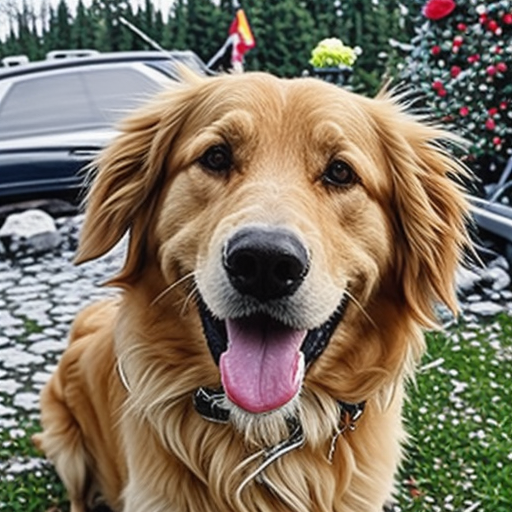

In [7]:
from PIL import Image

image = Image.open("./testimages/0.png")
outputs = pipeline(image)
print(outputs)
image

## Comparison between Images

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Total Scoring Time: 0.46 seconds
Average Scoring Time (per image): 0.06 seconds


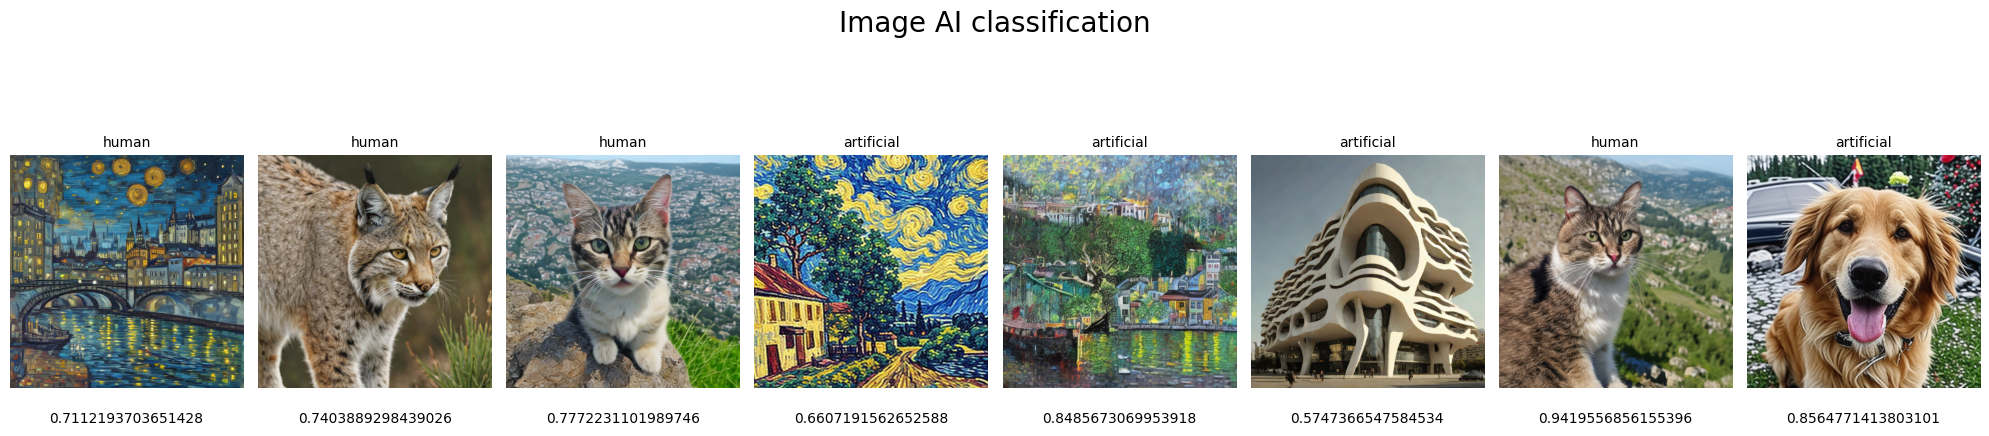

In [8]:
from model_helpers.images import load_images
from transformers import pipeline
import matplotlib.pyplot as plt
import model_helpers.auto_device as ad
import time

device = ad.auto_device()
# Original https://huggingface.co/umm-maybe/AI-image-detector
# Can also use newer version, but only works well on SDXL (https://huggingface.co/Organika/sdxl-detector)
pipeline = pipeline("image-classification", model="umm-maybe/AI-image-detector", device=device)
images = load_images("./testimages")

num_images = len(images)
fig, axs = plt.subplots(1, num_images, figsize=(20, 5)) 
fig.suptitle("Image AI classification", fontsize=20)

scoring_time = 0

for img_idx, image in enumerate(images):
    start_time = time.time()
    result = pipeline(image)
    scoring_time += time.time() - start_time

    label = result[0]['label']
    score = result[0]['score']

    # Plotting the image
    ax = axs[img_idx]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(label, fontsize=10)
    ax.text(0.5, -0.15, score, fontsize=10, ha='center', transform=ax.transAxes) 

# Print total and average scoring time
print(f"Total Scoring Time: {scoring_time:.2f} seconds")
print(f"Average Scoring Time (per image): {scoring_time/num_images:.2f} seconds")

plt.tight_layout()
plt.show()